In [27]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

df = X.copy()
df['G3'] = y['G3']  # Combine features and final grade into one DataFrame

  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

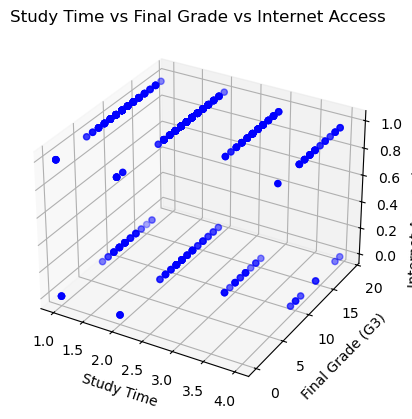

In [28]:
#1. Study Time vs. Internet Access vs. Final Grade
# Goal: Determine whether having internet access improves the impact of study time on final grades.
# Key Takeaway: Students who have greater access to the internet and study time typically perform better.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
internet_numeric = df['internet'].map({'yes': 1, 'no': 0})
ax.scatter(df['studytime'], df['G3'], internet_numeric, c='blue')
ax.set_xlabel('Study Time')
ax.set_ylabel('Final Grade (G3)')
ax.set_zlabel('Internet Access (1=yes, 0=no)')
ax.set_title('Study Time vs Final Grade vs Internet Access')
plt.show()


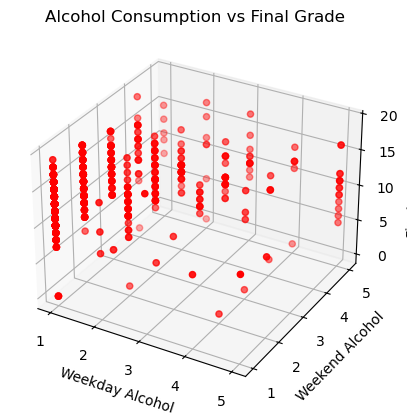

In [29]:
# 2. Alcohol Use on Weekdays versus Weekends versus Final Grade
# Goal: Examine whether drinking has an impact on academic achievement.
# Key Takeaway: There seems to be a stronger correlation between poorer grades and heavy weekend drinking.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Dalc'], df['Walc'], df['G3'], c='red')
ax.set_xlabel('Weekday Alcohol')
ax.set_ylabel('Weekend Alcohol')
ax.set_zlabel('Final Grade (G3)')
ax.set_title('Alcohol Consumption vs Final Grade')
plt.show()

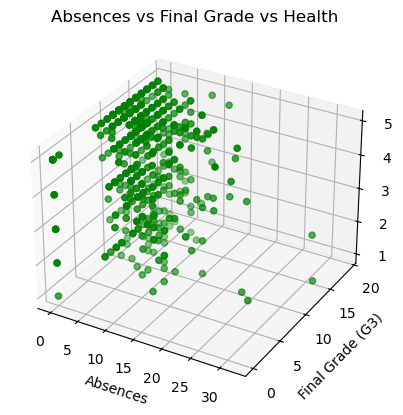

In [30]:
# Visualization 3: Absences vs Final Grade vs Health
# Goal: Investigate the connections between academic performance and attendance at school and health.
# Key Takeaway: Lower final grades are typically associated with poor health and high absence rates.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['absences'], df['G3'], df['health'], c='green')
ax.set_xlabel('Absences')
ax.set_ylabel('Final Grade (G3)')
ax.set_zlabel('Health (1-5)')
ax.set_title('Absences vs Final Grade vs Health')
plt.show()

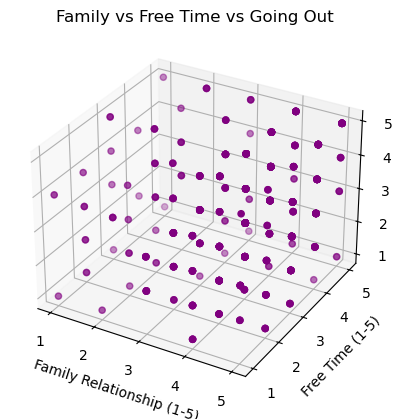

In [31]:
# Visualization 4: Family Relationship vs Free Time vs Going Out
# Goal: Examine the effects of family support on students' social behaviors.
# Key Takeaway: A healthier balance may be promoted by strong family ties.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['famrel'], df['freetime'], df['goout'], c='purple')
ax.set_xlabel('Family Relationship (1-5)')
ax.set_ylabel('Free Time (1-5)')
ax.set_zlabel('Going Out (1-5)')
ax.set_title('Family vs Free Time vs Going Out')
plt.show()

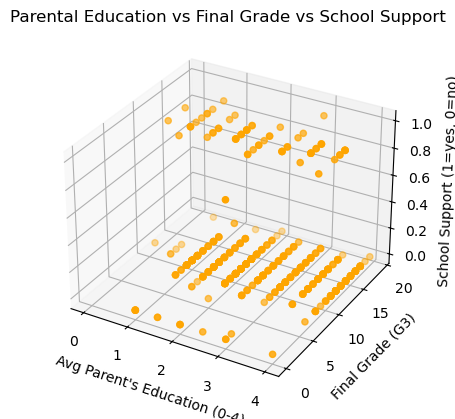

In [32]:
# Visualization 5: Parental Education vs Final Grade vs School Support
# Goal: Determine if low parental education is compensated for by school support.
# Key Takeaway: Students who have parents with lower levels of education benefit greatly from school support.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
df['parentEdu'] = (df['Medu'] + df['Fedu']) / 2
school_support = df['schoolsup'].map({'yes': 1, 'no': 0})
ax.scatter(df['parentEdu'], df['G3'], school_support, c='orange')
ax.set_xlabel("Avg Parent's Education (0-4)")
ax.set_ylabel('Final Grade (G3)')
ax.set_zlabel('School Support (1=yes, 0=no)')
ax.set_title("Parental Education vs Final Grade vs School Support")
plt.show()